Analyze the effect of high dose naspm on spontaneous synaptic transmission

In [1]:
import numpy as np
import pandas as pd
import scipy.io as sio
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from scipy import stats as sc
import pdb
from Patch_ana import patch_pip, spon_ana
import seaborn as sns
import pickle
from matplotlib.backends.backend_pdf import PdfPages
plt.style.use('classic')
import seaborn as sns

% matplotlib inline
# % matplotlib notebook

%load_ext autoreload
% autoreload 2

In [2]:
cd /data

/data


In [3]:
data_ana = pd.read_pickle('/data/ana_post_2Hz_reci')
data_ana

,Before,After,File name,elimi,spon_elimi_bef,spon_elimi_aft
121,"{'ave_amp2': [[7.16454009257e-11], [1.06104555...","{'ave_amp2': [[8.61548518638e-11], [8.63067876...",2017081802,30,"[0, 1, 15, 20, 21, 22, 25, 32, 39, 42, 78]","[52, 57, 64, 65]"
122,"{'ave_amp2': [[4.20365332987e-11], [3.63101441...","{'ave_amp2': [[8.805801192e-11], [9.9053544892...",2017082302,50,"[0, 3, 24, 25, 26, 37, 47, 50]","[67, 73, 80, 81, 82, 84, 88, 90, 96, 101, 116,..."
123,"{'ave_amp2': [[3.27702541827e-11], [4.76064506...","{'ave_amp2': [[6.39098044377e-11], [7.13580406...",2017082304,40,"[16, 18, 19]","[38, 44, 50, 56, 57, 71, 84, 88, 95]"
124,"{'ave_amp2': [[4.02024090972e-11], [5.35600257...","{'ave_amp2': [[9.19456525943e-11], [9.22985320...",2017082402,40,"[0, 2, 4, 10, 35, 54]",[37]
125,"{'ave_amp2': [[8.79640176131e-11], [1.01505669...","{'ave_amp2': [[1.02016443984e-10], [9.08422760...",2017083001,45,"[0, 9, 20, 22, 25, 31, 35, 49, 52, 56, 59]","[57, 63, 67, 70, 71, 80, 104]"
126,"{'ave_amp2': [[2.71850733562e-11], [2.53024871...","{'ave_amp2': [[2.50714174338e-11], [2.49829323...",2017083101,30,"[3, 5, 12, 13, 14, 15, 16, 19, 24, 44, 50, 67,...","[37, 39, 45, 46, 59, 60]"


In [16]:
amp_bef = []
amp_aft = []
onset_tau_bef = []
onset_tau_aft = []
decay_tau_bef = []
decay_tau_aft = []
freq_bef_fast = []
freq_aft_fast = []
freq_bef_slow = []
freq_aft_slow = []
data_index = list(data_ana.index)
for i in range(len(data_ana)):
    target = data_index[i]
    psc_naspm_bef = pd.read_pickle('/data/psc_post_2Hz_slope2_thres2.5_before_'+str(target))
    psc_naspm_aft = pd.read_pickle('/data/psc_post_2Hz_slope2_thres2.5_after_'+str(target))
    para_bef, para_aft = spon_ana.pair_amp_tau(psc_naspm_bef, psc_naspm_aft)
    amp_bef.append(para_bef['amp'][-500:])
    amp_aft.append(para_aft['amp'][-500:])
    onset_tau_bef.append(para_bef['onset_tau'][-500:])
    onset_tau_aft.append(para_aft['onset_tau'][-500:])
    decay_tau_bef.append(para_bef['decay_tau'][-500:])
    decay_tau_aft.append(para_aft['decay_tau'][-500:])
    #freq_bef.append(len(para_bef['decay_tau'][para_bef['decay_tau']<0.0005]))
    #freq_aft.append(len(para_aft['decay_tau'][para_aft['decay_tau']<0.0005]))
    para_bef['decay_tau'] = para_bef['decay_tau'][-500:]
    para_aft['decay_tau'] = para_aft['decay_tau'][-500:]
    freq_bef_fast.append(len(para_bef['decay_tau'][para_bef['decay_tau']<0.0005]))
    freq_aft_fast.append(len(para_aft['decay_tau'][para_aft['decay_tau']<0.0005]))
    freq_bef_slow.append(len(para_bef['decay_tau'][para_bef['decay_tau']>0.0005]))
    freq_aft_slow.append(len(para_aft['decay_tau'][para_aft['decay_tau']>0.0005]))
amp_bef = np.hstack(amp_bef)
amp_aft = np.hstack(amp_aft)
onset_tau_bef = np.hstack(onset_tau_bef)
onset_tau_aft = np.hstack(onset_tau_aft)
decay_tau_bef = np.hstack(decay_tau_bef)
decay_tau_aft = np.hstack(decay_tau_aft)

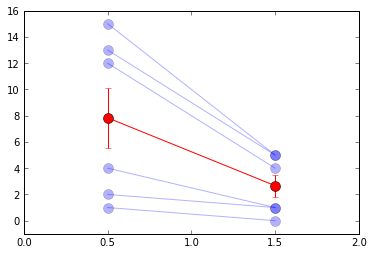

In [23]:
freq_bef_mean = np.mean(freq_bef_fast)
freq_bef_ste = np.std(freq_bef_fast)/np.sqrt(len(freq_bef_fast))
freq_aft_mean = np.mean(freq_aft_fast)
freq_aft_ste = np.std(freq_aft_fast)/np.sqrt(len(freq_aft_fast))

for i, j in zip(freq_bef_fast, freq_aft_fast):
    plt.plot([0.5,1.5], [i,j], 'bo-', alpha=0.3, markersize=10)
plt.errorbar([0.5,1.5], [freq_bef_mean, freq_aft_mean], [freq_bef_ste, freq_aft_ste], fmt='r-o', markersize=10)
plt.xlim([0,2])
plt.ylim([-1,16])

with PdfPages('/data/mini_freq_post_2_fast.pdf') as pdf:
    pdf.savefig()

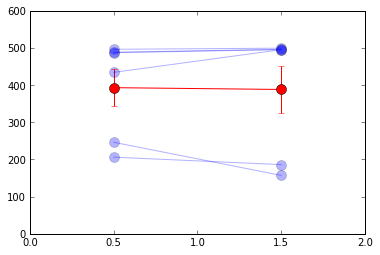

In [25]:
freq_bef_mean = np.mean(freq_bef_slow)
freq_bef_ste = np.std(freq_bef_slow)/np.sqrt(len(freq_bef_slow))
freq_aft_mean = np.mean(freq_aft_slow)
freq_aft_ste = np.std(freq_aft_slow)/np.sqrt(len(freq_aft_slow))

for i, j in zip(freq_bef_slow, freq_aft_slow):
    plt.plot([0.5,1.5], [i,j], 'bo-', alpha=0.3, markersize=10)
plt.errorbar([0.5,1.5], [freq_bef_mean, freq_aft_mean], [freq_bef_ste, freq_aft_ste], fmt='r-o', markersize=10)
plt.xlim([0,2])
plt.ylim([0,600])

with PdfPages('/data/mini_freq_post_2_slow.pdf') as pdf:
    pdf.savefig()

In [153]:
freq_bef

[0, 3, 2, 4, 1, 0]

In [154]:
freq_aft

[0, 1, 0, 1, 2, 0]

In [155]:
sc.ttest_rel(freq_bef, freq_aft)

Ttest_relResult(statistic=1.5811388300841895, pvalue=0.17468781426411925)

(0, 4e-10)

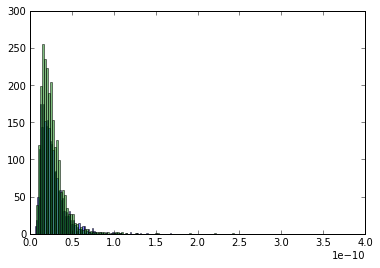

In [138]:
plt.hist(amp_bef, bins=100, alpha=0.5)
plt.hist(amp_aft, bins=100, alpha=0.5)
plt.xlim([0, 4e-10])

RanksumsResult(statistic=-0.35442236483706741, pvalue=0.72302237624051258)


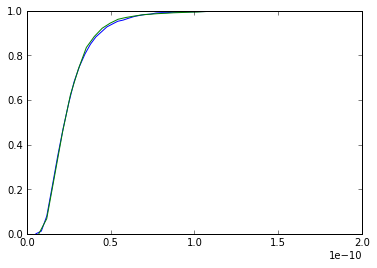

In [139]:
bin_edge_bef, cdf_amp_bef = spon_ana.cdf_gen(amp_bef)
bin_edge_aft, cdf_amp_aft = spon_ana.cdf_gen(amp_aft)
plt.plot(bin_edge_bef, cdf_amp_bef)
plt.plot(bin_edge_aft, cdf_amp_aft)
#plt.xlim([0,1e-10])
print(sc.ranksums(amp_bef, amp_aft))

with PdfPages('/data/anti_hebbian_mini_amp.pdf') as pdf:
    pdf.savefig()

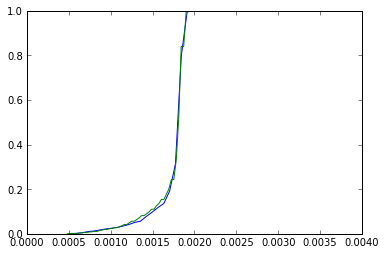

In [140]:
bin_edge_bef, cdf_amp_bef = spon_ana.cdf_gen(onset_tau_bef)
bin_edge_aft, cdf_amp_aft = spon_ana.cdf_gen(onset_tau_aft)
plt.plot(bin_edge_bef, cdf_amp_bef)
plt.plot(bin_edge_aft, cdf_amp_aft)
sc.ranksums(onset_tau_bef, onset_tau_aft)

with PdfPages('/data/anti_hebbian_mini_onset_tau.pdf') as pdf:
    pdf.savefig()

(array([    4.,     4.,     7.,     6.,    13.,    11.,     9.,    10.,
           21.,    30.,    33.,    43.,    38.,    29.,    60.,    96.,
          155.,   646.,  1121.,     8.]),
 array([ 0.00048 ,  0.000554,  0.000628,  0.000702,  0.000776,  0.00085 ,
         0.000924,  0.000998,  0.001072,  0.001146,  0.00122 ,  0.001294,
         0.001368,  0.001442,  0.001516,  0.00159 ,  0.001664,  0.001738,
         0.001812,  0.001886,  0.00196 ]),
 <a list of 20 Patch objects>)

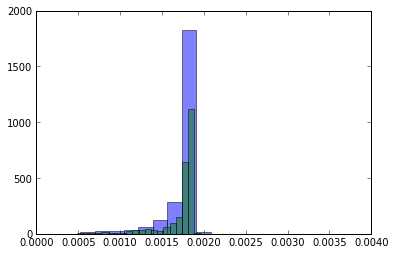

In [141]:
plt.hist(onset_tau_bef, alpha=0.5, bins=20)
plt.hist(onset_tau_aft, alpha=0.5, bins=20)

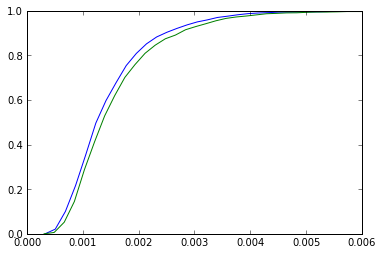

In [142]:
bin_edge_bef, cdf_amp_bef = spon_ana.cdf_gen(decay_tau_bef)
bin_edge_aft, cdf_amp_aft = spon_ana.cdf_gen(decay_tau_aft)
plt.plot(bin_edge_bef, cdf_amp_bef)
plt.plot(bin_edge_aft, cdf_amp_aft)
plt.xlim([0,0.006])

with PdfPages('/data/post_2Hz_mini_decay_tau.pdf') as pdf:
    pdf.savefig()

In [143]:
sc.ttest_ind(decay_tau_bef, decay_tau_aft)

Ttest_indResult(statistic=-4.7718352383851306, pvalue=1.8803532829753747e-06)

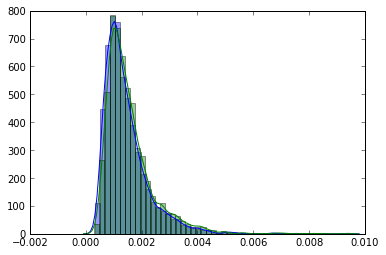

In [48]:
sns.distplot(decay_tau_bef, bins=50)
sns.distplot(decay_tau_aft, bins=50)

In [57]:
log_amp_bef = np.log(para_bef['amp'])
log_amp_aft = np.log(para_aft['amp'])
log_decay_bef = np.log(para_bef['decay_tau'])
log_decay_aft = np.log(para_aft['decay_tau'])

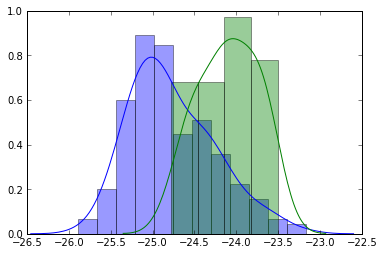

In [43]:
sns.distplot(log_amp_bef)
sns.distplot(np.log(decay_tau_stim_bef))

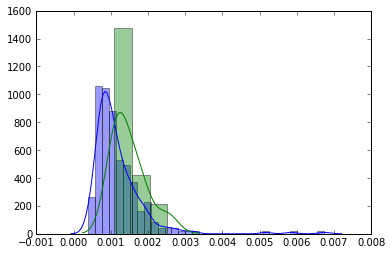

In [11]:
sns.distplot(para_bef['decay_tau'])
sns.distplot(decay_tau_stim_bef)

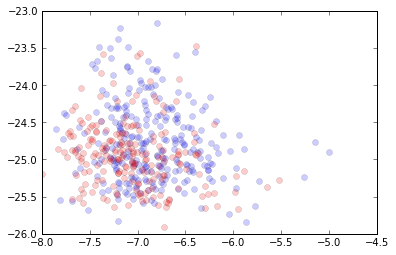

In [12]:
plt.plot(log_decay_bef,log_amp_bef , 'o', alpha=0.2)
plt.plot(log_decay_aft,log_amp_aft , 'ro', alpha=0.2)
# plt.xlim([-8.5, -4.5])
# plt.ylim([-26.5, -23])

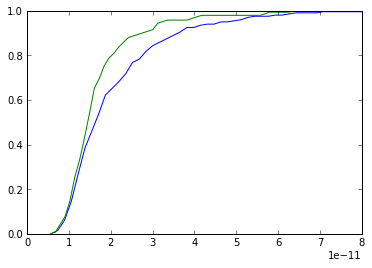

In [48]:
bin_edge_bef, cdf_amp_bef = spon_ana.cdf_gen(para_bef['amp'])
bin_edge_aft, cdf_amp_aft = spon_ana.cdf_gen(para_aft['amp'])
plt.plot(bin_edge_bef, cdf_amp_bef)
plt.plot(bin_edge_aft, cdf_amp_aft)

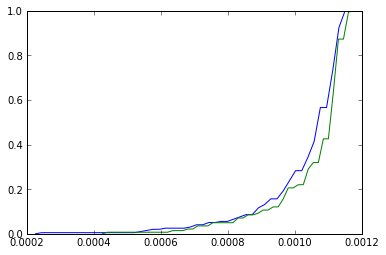

In [49]:
bin_edge_bef, cdf_amp_bef = spon_ana.cdf_gen(para_bef['onset_tau'])
bin_edge_aft, cdf_amp_aft = spon_ana.cdf_gen(para_aft['onset_tau'])
plt.plot(bin_edge_bef, cdf_amp_bef)
plt.plot(bin_edge_aft, cdf_amp_aft)